# 7장 규제된 선형 회귀

---

## 회귀 모형과 회귀 계수
- 지금까지의 선형 회귀 모형은 비용 함수 RSS를 최소화 하는데에 초점
- 이에 따라서 훈련 데이터에는 지나치게 잘 맞고 회귀 계수가 커지게 되어, 검증 데이터에서는 올바르게 예측을 하지 못할 수 있다. (과대적합)
- 따라서 비용 함수는 RSS를 최소화 하면서도 **회귀 계수 값이 너무 커지지 않도록** 균형을 이룰 필요
- 비용 함수의 목표는 다음과 같이 수정

<center>$ cost = min(RSS(w)$ <span style="color:red"> $ + \alpha × f(w)$</span>$)$</center>

- 매개변수 α의 값에 따라서 잔차제곱합 RSS와 회귀 계수에 대한 **추가 제약 조건 f(w)**의 비중이 달라짐
- **α가 0이라면**, 비용 함수는 기존과 동일하게 RSS 값으로 적용, 이 때의 목표는 결국 **RSS 값을 최소화 시키는 것**
- **α가 매우 큰 값**이라면, 상대적으로 RSS 값은 의미가 없고 f(w)의 값이 비용 함수의 대부분을 차지한다. 이 때의 목표는 이 **f(w)의 값을 최소화 시키는 것**

---

## 규제 (Regularization)
- 결과적으로, α의 값을 0부터 차츰 증가시키면 회귀 계수 w값의 크기를 감소시킬 수 있음
- 이렇게 회귀 계수 값의 크기를 감소시켜서 과대적합 문제를 개선하여 학습하는 것을 규제라고 하며, 크게 L1 규제와 L2규제로 구분
    - **L1 규제** : f(w)가 회귀 계수 w들의 **절대값**들의 합
    - **L2 규제** : f(w)가 회귀 계수 w들의 **제곱**합

---

## 릿지 회귀 (Ridge Regression)
- 릿지(Ridege) : 산등성이, 약간 부드러운 느낌
- L2 규제를 적용한 회귀를 릿지 회귀라고 함

<center>$ cost = min(RSS(w)$ <span style="color:red"> $ + \alpha × \frac{1}{2}\sum {w_i}^2$</span>$)$</center>

- α가 0이라면, 비용 함수는 기존과 동일하게 RSS 값으로 적용된다. 따라서 기본적인 선형 회귀와 같아짐
- α가 매우 큰 값이라면, 회귀 계수들의 제곱합이 최소화되어야 하므로 회귀 계수들이 거의 0에 근접한다. 따라서 회귀 모형은 데이터의 평균을 지나가는 수평선이 됨

### 사이킷런으로 릿지 회귀 수행

#### linear_model 모듈에 있는 Ridge를 이용하여 릿지 회귀를 수행

```python
# 매개변수 alpha는 L2 규제 계수인 α 값
import sklearn.linear_model as lm

ridge = lm.Ridge(alpha=0.01)
reg = ridge.fit(X_train,y_train)
```

- alpha를 0으로 지정해서 수행하면, LinearRegression을 이용한 일반적인 선형 회귀와 동일한 결과가 나오는 것을 확인
- alpha를 증가시키면, 회귀 계수의 값들이 점차 작아져서 0에 가까워지는 것을 확인할 수

#### 사이킷런으로 릿지 회귀 수행
- 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 경우


In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import matplotlib.pyplot as plt

In [2]:
diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(diab.data,
                                                       diab.target,
                                                       test_size=0.3,
                                                       random_state=78)

In [3]:
# Ridge 규제를 하는 경우
ridge = lm.Ridge(alpha=0.01) # alpha 값은 하이퍼파라미터라 내가 찾아봐야해
reg = ridge.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(mt.r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

cf = pd.Series(data=np.round(reg.coef_, 3),
               index=diab.feature_names)
cf

0.5126648996637304
[ -29.33885142 -179.50971188  450.733122    367.43956479 -436.69913285
  239.09371599  -95.21457541  -23.61899478  735.28579689   60.54766425]
153.4224680655062


age    -29.339
sex   -179.510
bmi    450.733
bp     367.440
s1    -436.699
s2     239.094
s3     -95.215
s4     -23.619
s5     735.286
s6      60.548
dtype: float64

In [4]:
# 규제를 하지 않는 경우
lr2 = lm.LinearRegression()
reg2 = lr2.fit(X_train, y_train)

y_pred2 = reg.predict(X_test)
print(mt.r2_score(y_test, y_pred2))
print(reg2.coef_)
print(reg2.intercept_)

cf = pd.Series(data=np.round(reg2.coef_, 3),
               index=diab.feature_names)
cf

0.5126648996637304
[  -40.6505383   -188.83378414   446.19384318   376.68855544
 -1088.03637845   762.81201373   181.58759996    35.48597868
  1003.98013082    52.82014062]
153.5062805641863


age     -40.651
sex    -188.834
bmi     446.194
bp      376.689
s1    -1088.036
s2      762.812
s3      181.588
s4       35.486
s5     1003.980
s6       52.820
dtype: float64

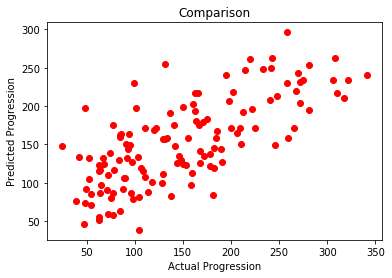

In [5]:
plt.scatter(y_test,y_pred,color='red')
plt.title('Comparison')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.show()

In [6]:
alpha_list = [0, 0.01, 0.1, 1, 10, 100]
df = pd.DataFrame()

for alpha in alpha_list:
    ridge = lm.Ridge(alpha=alpha)
    reg = ridge.fit(diab.data, diab.target)
    y_pred = reg.predict(X_test)
    r2 = mt.r2_score(y_test, y_pred)
    cf = pd.Series(data=np.hstack([reg.coef_,
                                   reg.intercept_,r2]),  # 붙이기 위해서
                   index=[s.upper() for s in diab.feature_names]+['INTERCEPT','R2 Score'])
    colname='alpha = ' + str(alpha)
    df[colname]=cf
df

,alpha = 0,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,-7.199457,1.307349,29.465746,19.812822,2.897090
SEX,-239.819089,-234.552930,-207.194814,-83.154885,-0.918458,0.585254
BMI,519.839787,520.583136,489.691080,306.351627,75.416167,9.240719
BP,324.390428,320.523356,301.769437,201.629434,55.025419,6.931321
S1,-792.184162,-380.607066,-83.466074,5.909369,19.924600,3.230957
S2,476.745838,150.483752,-70.828096,-29.515927,13.948686,2.616766
S3,101.044570,-78.591232,-188.680164,-152.040465,-47.553816,-6.174550
S4,177.064176,130.313059,115.712703,117.311715,48.259420,6.678027
S5,751.279321,592.349587,443.814054,262.944995,70.144068,8.876864
S6,67.625386,71.133768,86.748539,111.878718,44.213876,5.955597


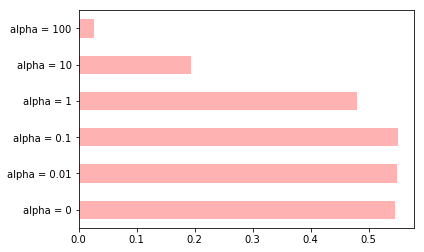

In [7]:
df.loc['R2 Score'].plot(kind='barh',color='red',alpha=0.3)
plt.show()

---

## 라쏘 회귀 (Lasso Regression)
- L1 규제를 적용한 회귀를 라쏘 회귀라고 한다

<center>$ cost = min(RSS(w)$ <span style="color:red"> $ + \alpha × \sum |w_i|$</span>$)$</center>


- L1 규제는 불필요한 회귀 계수를 가급적 0으로 만들어 제거하려는 특징이 있다. 따라서 결과적으로는 적절한 특성들만 회귀 모형에 포함

### 사이킷런으로 라쏘 회귀 수행

#### linear_model 모듈에 있는 Lasso를 이용하여 라쏘 회귀 수행

```python
import sklearn.linear_model as lm
lasso = lm.Lasso(alpha=0.01)
reg = lasso.fit(X_train,y_train)
```

- 매개변수 alpha는 L1 규제 계수인 α 값
- alpha를 0으로 지정해서 수행하면, LinearRegression을 이용한 일반적인 선형 회귀와 동일한 결과가 나오는 것을 확인
- alpha를 증가시키면, 회귀 계수의 값들이 급격하게 0에 수렴하는 것을 확인

#### 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 경우

In [8]:
lasso = lm.Lasso(alpha=0.01)
reg = lasso.fit(X_train,y_train)

y_pred = reg.predict(X_test)

print(mt.r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

cf = pd.Series(data=np.round(reg.coef_, 3),
               index=diab.feature_names)
cf

0.5088520367941951
[ -27.91289354 -177.58529595  451.92961693  367.9850682  -643.62974955
  400.50006229   -0.            0.          825.93272429   50.19067062]
153.43690368553345


age    -27.913
sex   -177.585
bmi    451.930
bp     367.985
s1    -643.630
s2     400.500
s3      -0.000
s4       0.000
s5     825.933
s6      50.191
dtype: float64

#### 당뇨병 진단 데이터에 대해 여러 alpha 값들로 수행한 결과
- 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용

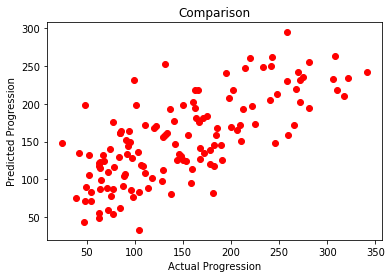

In [9]:
plt.scatter(y_test,y_pred,color='red')
plt.title('Comparison')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.show()

In [10]:
alpha_list = [0, 0.01, 0.1, 1, 10, 100]
df = pd.DataFrame()

for alpha in alpha_list:
    lasso = lm.Lasso(alpha=alpha)
    reg = lasso.fit(diab.data, diab.target)
    y_pred = reg.predict(X_test)
    r2 = mt.r2_score(y_test, y_pred)
    cf = pd.Series(data=np.hstack([reg.coef_,
                                   reg.intercept_,r2]),  # 붙이기 위해서
                   index=[s.upper() for s in diab.feature_names]+['INTERCEPT','R2 Score'])
    colname='alpha = ' + str(alpha)
    df[colname]=cf
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,alpha = 0,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,-1.306575,-0.000000,0.000000,0.000000,0.000000
SEX,-239.819089,-228.822331,-155.362882,-0.000000,0.000000,0.000000
BMI,519.839787,525.560658,517.182017,367.701852,0.000000,0.000000
BP,324.390428,316.175320,275.082351,6.301904,0.000000,0.000000
S1,-792.184135,-307.013677,-52.540269,0.000000,0.000000,0.000000
S2,476.745817,89.321688,-0.000000,0.000000,0.000000,0.000000
S3,101.044558,-105.081398,-210.159753,-0.000000,-0.000000,-0.000000
S4,177.064173,119.597989,0.000000,0.000000,0.000000,0.000000
S5,751.279311,571.330871,483.914409,307.605700,0.000000,0.000000
S6,67.625386,65.007316,33.672821,0.000000,0.000000,0.000000


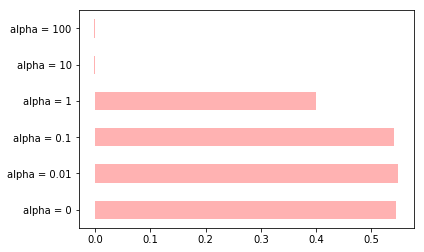

In [11]:
df.loc['R2 Score'].plot(kind='barh',color='red',alpha=0.3)
plt.show()

## 엘라스틱넷 회귀 (Elastic Net Regression)
- L1 규제와 L2 규제를 혼합한 회귀를 엘라스틱넷 회귀

<center>$ cost = min(RSS(w)$ <span style="color:red"> $ +r \alpha × \sum |w_i| + (1-r) \alpha × \frac{1}{2}\sum {w_i}^2 $</span>$)$</center>

- α는규제 매개변수이고 r 은 혼합 비율
- 두 종류의 규제를 혼합하여 릿지 회귀와 라쏘 회귀의 절충형태를 학습 모형으로 도출가능
- r이 0이라면 L2 규제와 동일하므로 릿지 회귀
- r이 1이라면 L1 규제와 동일하므로 라쏘 회귀

### 사이킷런으로 엘라스틱넷 회귀 수행

#### linear_model 모듈에 있는 ElasticNet을 이용하여 엘라스틱넷 회귀를 수행
```python
import sklearn.linear_model as lm
elastic = lm.ElasticNet(alpha=0.01, l1_ratio = 0.5)
reg = elastic.fit(X_train,y_train)
```

#### 당뇨병 진단 데이터에 대해 alpha를 0.01로, l1_ratio를 0.5로 설정

In [12]:
elastic = lm.ElasticNet(alpha=0.01, l1_ratio = 0.5)
reg = elastic.fit(X_train,y_train)

y_pred = reg.predict(X_test)

print(mt.r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

cf = pd.Series(data=np.round(reg.coef_, 3),
               index=diab.feature_names)
cf

0.3829462987474108
[  41.46671684  -15.59490348  188.29056827  166.14589697   17.33566906
   -6.64488857 -113.20413249   88.28785247  193.03488657   97.61188591]
153.29024895016366


age     41.467
sex    -15.595
bmi    188.291
bp     166.146
s1      17.336
s2      -6.645
s3    -113.204
s4      88.288
s5     193.035
s6      97.612
dtype: float64

#### 당뇨병 진단 데이터에 대해 l1_ratio 값은 0.5로 고정하고 alpha를 변경하면서 수행한 결과

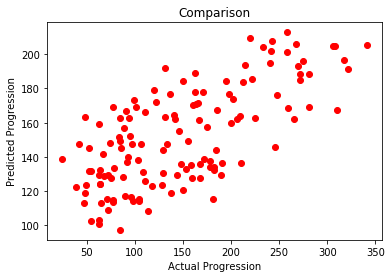

In [13]:
plt.scatter(y_test,y_pred,color='red')
plt.title('Comparison')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.show()

In [14]:
alpha_list = [0, 0.01, 0.1, 1, 10, 100]
df = pd.DataFrame()

for alpha in alpha_list:
    elastic = lm.ElasticNet(alpha=alpha, l1_ratio = 0.5)
    reg = elastic.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    r2 = mt.r2_score(y_test, y_pred)
    cf = pd.Series(data=np.hstack([reg.coef_,
                                   reg.intercept_,r2]),  # 붙이기 위해서
                   index=[s.upper() for s in diab.feature_names]+['INTERCEPT','R2 Score'])
    colname='alpha = ' + str(alpha)
    df[colname]=cf
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,alpha = 0,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
AGE,-40.650538,41.466717,12.797207,0.657362,0.000000,0.000000
SEX,-188.833784,-15.594903,3.729958,0.000000,0.000000,0.000000
BMI,446.193843,188.290568,34.105474,2.909372,0.000000,0.000000
BP,376.688555,166.145897,31.544251,2.651373,0.000000,0.000000
S1,-1088.036363,17.335669,10.235911,0.441368,0.000000,0.000000
S2,762.812001,-6.644889,7.023637,0.117559,0.000000,0.000000
S3,181.587593,-113.204132,-24.179772,-1.882600,-0.000000,-0.000000
S4,35.485976,88.287852,24.123522,1.985085,0.000000,0.000000
S5,1003.980125,193.034887,36.037684,3.166517,0.000000,0.000000
S6,52.820141,97.611886,23.603872,1.862494,0.000000,0.000000


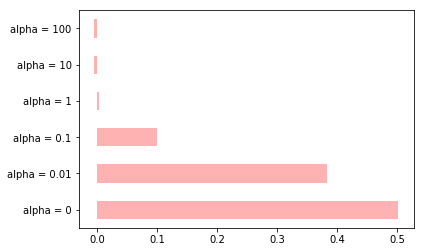

In [15]:
df.loc['R2 Score'].plot(kind='barh',color='red',alpha=0.3)
plt.show()

#### 당뇨병 진단 데이터에 대해 alpha 값은 0.01로 고정하고 l1_ratio를 변경하면서 수행한 결과

In [16]:
l1_ratio_list = [0,0.125, 0.25,0.375, 0.5,0.625, 0.75,0.875 ,1]
df = pd.DataFrame()

for l1_ratio in l1_ratio_list:
    elastic = lm.ElasticNet(alpha=0.01, l1_ratio = l1_ratio)
    reg = elastic.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    r2 = mt.r2_score(y_test, y_pred)
    cf = pd.Series(data=np.hstack([reg.coef_,
                                   reg.intercept_,r2]),  # 붙이기 위해서
                   index=[s.upper() for s in diab.feature_names]+['INTERCEPT','R2 Score'])
    colname='l1_ratio = ' + str(l1_ratio)
    df[colname]=cf
df

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,l1_ratio = 0,l1_ratio = 0.125,l1_ratio = 0.25,l1_ratio = 0.375,l1_ratio = 0.5,l1_ratio = 0.625,l1_ratio = 0.75,l1_ratio = 0.875,l1_ratio = 1
AGE,36.622103,38.150060,39.617718,40.829349,41.466717,40.699513,36.490697,22.246260,-27.912894
SEX,0.741200,-1.294863,-4.261657,-8.709764,-15.594903,-26.836615,-46.589847,-85.031303,-177.585296
BMI,124.503060,135.754640,149.422328,166.408902,188.290568,217.749902,260.197659,328.435008,451.929617
BP,112.359547,122.042127,133.688944,148.005329,166.145897,190.063329,223.526346,274.895846,367.985068
S1,22.506131,22.313625,21.678276,20.107946,17.335669,12.191012,2.269478,-11.831587,-643.629750
S2,7.700377,5.699898,2.775959,-0.616507,-6.644889,-16.154407,-31.654076,-60.230865,400.500062
S3,-81.124598,-87.249859,-94.419505,-102.916772,-113.204132,-125.925064,-142.109569,-165.449295,-0.000000
S4,70.939850,74.899202,79.198354,83.670140,88.287852,92.439640,94.386371,85.312268,0.000000
S5,128.278099,139.628521,153.429857,170.660192,193.034887,223.737434,269.864816,350.911247,825.932724
S6,74.481579,79.337965,84.797586,90.884169,97.611886,104.643369,110.574664,108.669663,50.190671


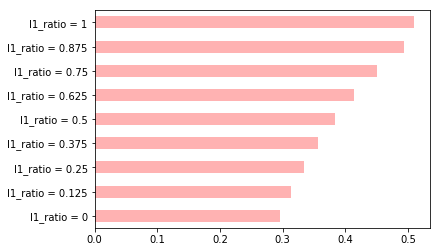

In [17]:
df.loc['R2 Score'].plot(kind='barh',color='red',alpha=0.3)
plt.show()

## 회귀 모형의 선택
- 기본적인 선형 회귀, 릿지, 라쏘, 엘라스틱넷 중 어떤 것이 가장 좋은 모형을 도출하는지는 상황에 따라 달라진
- 각 기법 별로 매개변수들을 변경해 가면서 학습하여 최적의 성능 지표를 나타내는 모형을 선택
- 다만, 다음과 같은 가이드를 참고하면 도움이 될 수 있음
    - 규제가 없는 기본 선형 회귀를 수행하면서 과대적합이 확실시 되면 릿지 회귀로 전환
    - 전체 특성들 중 일부만 의미가 있다고 유추할 수 있거나 관찰되었다면 라쏘 또는 엘라스틱넷 회귀를 시도
    - 특성들 간의 관련성이 높으면 (즉, 상관 계수가 높으면) 엘라스틱넷 회귀를 적용하는 것이 바람직